<h1 style="text-align: center;">Waste Sorting Using Computer Vision using MobileNet</h1>


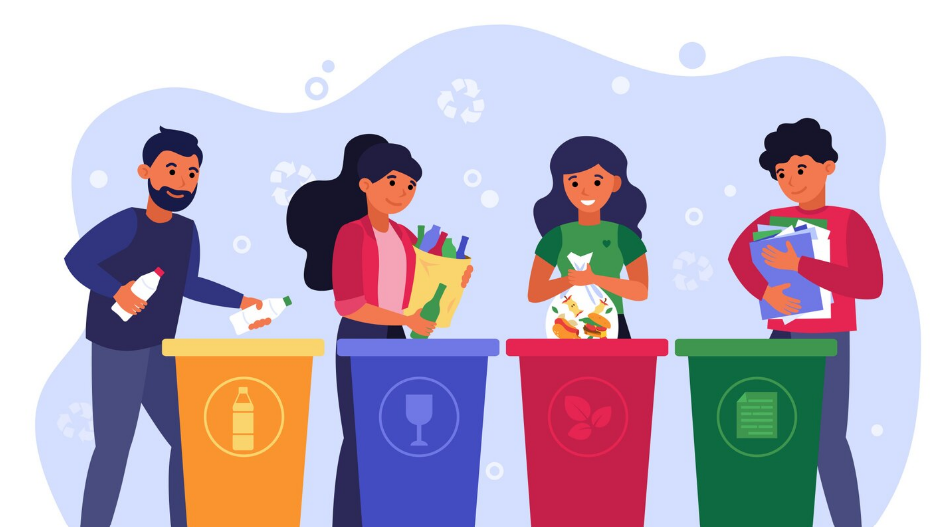

# 1. Problem Statement

Imagine if every piece of trash in the world could automatically find the right bin to go to! That’s the magic of computer vision with waste sorting. Sorting waste is essential for keeping our planet clean. When we sort waste correctly:

    Recyclables (like plastic bottles and cans) can be reused, which saves resources.
    Organic waste can be composted, helping plants grow.
    Non-recyclables go to landfills, but it’s better if we minimize them.

By training a computer to recognize waste, we can speed up sorting and reduce mistakes, helping the environment and recycling process.

# 2. Objectives

In this project, we will:

    Use computer vision to help identify types of waste.
    Train a model called MobileNet to "see" and categorize images as Organic (O) or Recyclable (R).
    Use a dataset of waste images, practice sorting them, and observe how the computer learns to differentiate between them.

# 3. Dataset Information

Our dataset contains images of waste items that belong to two categories:

    O (Organic): For food scraps, leaves, or other natural waste.
    R (Recyclable): For plastics, metals, and items that can be reused.

This dataset is organized into two folders:

    Train Folder: Where images are used to teach the computer what each type of waste looks like.
    Test Folder: To check if the computer has learned to sort images correctly.

Download Dataset Manually from Kaggle Website

    Go to the Kaggle website, navigate to the dataset you want (e.g., the "Waste Classification Data").
    URL for dataset used in this project : https://www.kaggle.com/datasets/techsash/waste-classification-data
    Click the URL and click Download to manually download the dataset as a ZIP file.
    Once downloaded, unzip the file and place it in your working directory.

# 4. Understanding MobileNet

Think of MobileNet as a quick learner that’s lightweight and fast. MobileNet is designed for mobile devices, making it perfect for applications where we don’t have a lot of computing power, like on phones or tablets. It can recognize objects by extracting features from images and comparing them to what it has learned.

    Lightweight: Works on mobile devices and runs fast.
    Good Accuracy: Efficiently identifies objects, like if an item is recyclable or organic.
    Feature Extraction: Takes essential details from images (like shapes and colors).

**Used for:**
- Image Classification: Recognizing objects or categories in images.
- Object Detection: Identifying and locating multiple objects in an image.
- Face Recognition: Efficient face detection and verification.
- Pose Estimation: Tracking human body parts in video streams.
- Edge Computing: Vision tasks in IoT devices without cloud dependence

**Limitations**
- Slightly Lower Accuracy: May not match the performance of larger models (e.g., ResNet) on challenging datasets.
- Specialized Design: Best suited for edge applications; not ideal for large-scale server-side tasks requiring maximum accuracy.

# 5. Code Implementation

Let’s walk through the code to see how we train MobileNet to sort waste images.

#### Import Libraries and Prepare Dataset

Found 50154 images belonging to 2 classes.
Found 50154 images belonging to 2 classes.


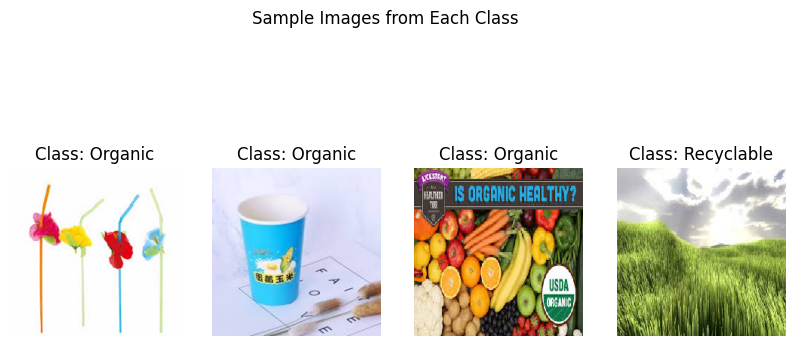

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths to the train and test directories

base_dir = r"Dataset"
train_dir =  r"/kaggle/input/waste-classification-data/"
test_dir =  r"/kaggle/input/waste-classification-data/"
# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):  # Display 4 images (2 from each class if available)
    image, label = next(train_data)  # Use next() to get a batch of images
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()


#### Load and Configure MobileNet Model

**MobileNet Variants**
- MobileNetV1: Introduced depthwise separable convolutions.
- MobileNetV2: Improved with inverted residuals and linear bottlenecks for better performance.
- MobileNetV3: Combines MobileNetV2 with additional optimizations from neural architecture search (NAS) for even better accuracy and efficiency.

In [16]:
mobilenet_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='/kaggle/input/waste-classifier/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top (1).h5'
)
mobilenet_model.trainable=False
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Reduce (7, 7, 1280) -> (1280)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)

#### Train the Model

# 7. Conclusion

By learning to identify waste, MobileNet becomes a helpful tool in sorting. This project highlights how computer vision can make real-life processes like waste sorting easier and faster. Using this setup, we can eventually create applications for recycling plants or even home use, contributing to a cleaner and more sustainable world.

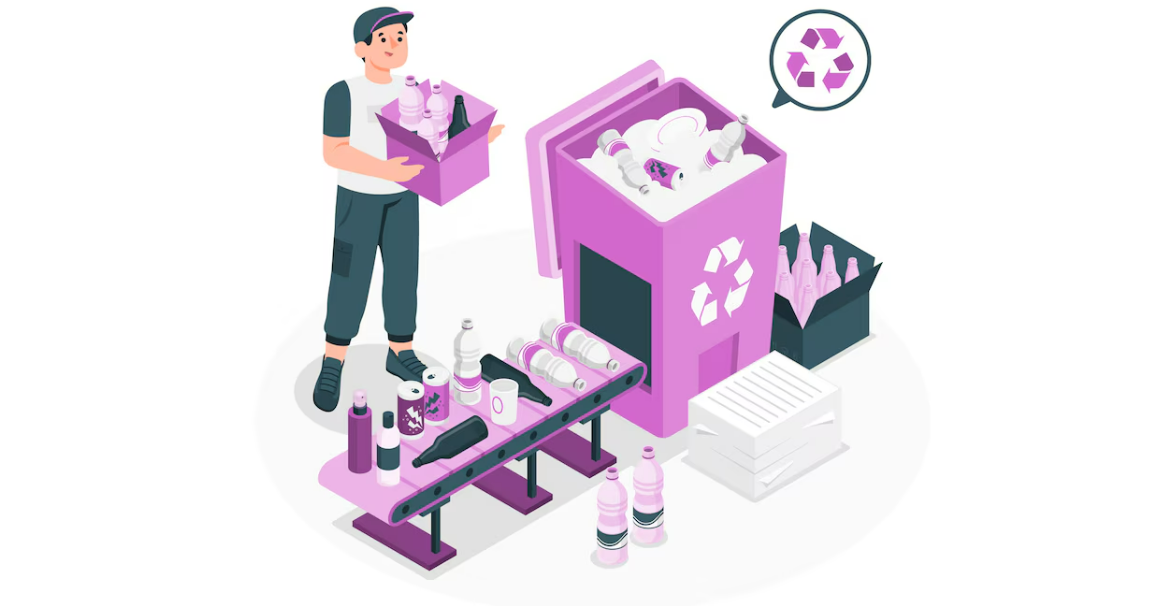